# OpenCV
Этот ноутбук призван продемонстрировать вам некоторые возможности библиотеки OpenCV. Перед использованием закиньте изображение Лены в Colab.

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Для начала прочитаем наше изображение.

In [23]:
img = cv2.imread('Lenna.png')

Запринтим изображение, чтобы увидеть, как оно выглядит с точки зрения компьютера:

In [24]:
print(img)

[[[111 138 227]
  [108 134 226]
  [110 132 225]
  ...
  [ 86  84 194]
  [ 85  82 188]
  [ 84  79 185]]

 [[111 136 227]
  [110 133 227]
  [109 130 225]
  ...
  [ 86  88 190]
  [ 80  80 181]
  [ 80  76 177]]

 [[110 134 225]
  [109 132 225]
  [110 131 225]
  ...
  [ 81  84 184]
  [ 83  81 178]
  [ 81  77 174]]

 ...

 [[ 60  30  81]
  [ 59  27  83]
  [ 55  19  80]
  ...
  [ 87  77 187]
  [ 86  87 184]
  [ 85  83 185]]

 [[ 58  27  84]
  [ 57  26  85]
  [ 54  19  83]
  ...
  [ 80  68 186]
  [ 83  73 192]
  [ 85  74 193]]

 [[ 58  24  84]
  [ 57  22  85]
  [ 56  16  84]
  ...
  [ 76  65 178]
  [ 78  70 183]
  [ 82  73 186]]]


А теперь, с помощью matplotlib (так удобнее) отрисуем изображение уже в виде изображения:

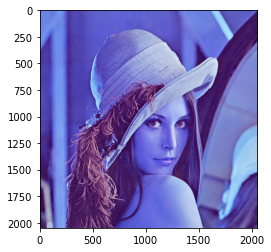

In [25]:
plt.imshow(img)
plt.show()

Видим, что изображение какое-то синее. Дело в том, что часто при чтении изображения оно читается как BGR, а не RGB, но это не трудно исправить

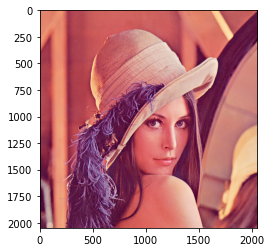

In [26]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# Кадрирование
Вот теперь все в порядке, можем начать издеваться над нашей Леной. Начнем с кадрирования изображения. Это очень легко делать, просто используя стандартные срезы матрицы нумпая.

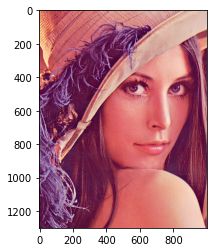

In [27]:
cropped_img = img[600:1900, 500:1500]
plt.imshow(cropped_img)
plt.show()

## Изменение размера

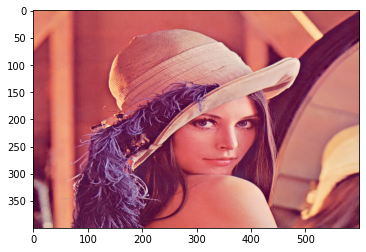

In [28]:
resized_img = cv2.resize(img, (600, 400), interpolation = cv2.INTER_AREA)
plt.imshow(resized_img)
plt.show()

# Рисование прямоугольников

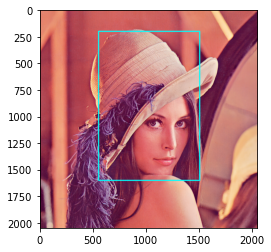

In [29]:
output = img.copy()
cv2.rectangle(output, (550, 200), (1500, 1600), (0, 255, 255), 10)
plt.imshow(output)
plt.show()

# Текст на изображении

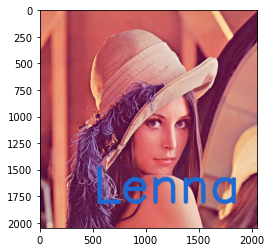

In [30]:
output = img.copy()
cv2.putText(output, "Lenna", (500, 1800), cv2.FONT_HERSHEY_SIMPLEX, 15, (30, 105, 210), 40) 
plt.imshow(output)
plt.show()

# Градации серого и threshold

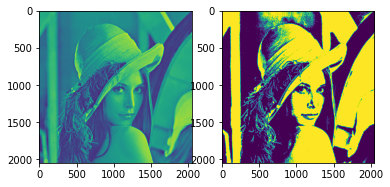

In [31]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, thresholded_img = cv2.threshold(gray_img, 127, 255, 0)
plt.subplot(121)
plt.imshow(gray_img)
plt.subplot(122)
plt.imshow(thresholded_img)
plt.show()

Мы столкнулись с проблемой отображения одномерных изображений, надо отдельно указывать цветовую карту. Сделаем это.

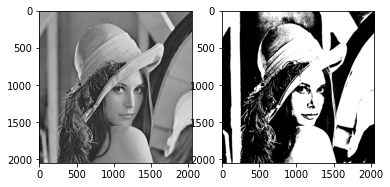

In [33]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, thresholded_img = cv2.threshold(gray_img, 127, 255, 0)
plt.subplot(121)
plt.imshow(gray_img, cmap='gray')
plt.subplot(122)
plt.imshow(thresholded_img, cmap='gray')
plt.show()

# Фильтры
Теперь можно пройтись по различным фильтрами, они пригодятся вам, когда у вас будут зашумленные изображения

In [34]:
noise = np.random.randint(0, 255, (2048,2048,3)).astype(np.uint8)
noisy_img = cv2.addWeighted(img, 0.7, noise, 0.3, 2.2) # кстати, это способ получить смесь изображений

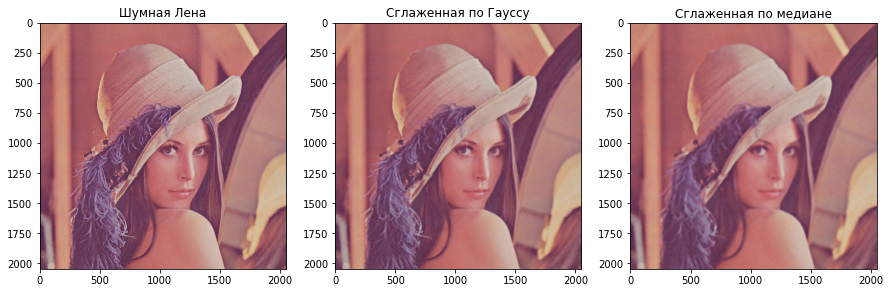

In [35]:
gblurred_img = cv2.GaussianBlur(noisy_img, (21, 21), 0)
mblurred_img = cv2.medianBlur(noisy_img, 21)
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title('Шумная Лена')
plt.imshow(noisy_img)
plt.subplot(132)
plt.title('Сглаженная по Гауссу')
plt.imshow(gblurred_img)
plt.subplot(133)
plt.title('Сглаженная по медиане')
plt.imshow(mblurred_img)
plt.show()

# Задание 1
Нужно локализовать на изображении дорожный знак пешеходный переход с помощью цветового порога. Результатом у вас должна получиться маска изображения, на которой хорошо выделен дорожный знак. (Рекомендую перевести изображение в HSV и погуглить функцию inRange). Финальную маску изображения попрошу назвать result_image.

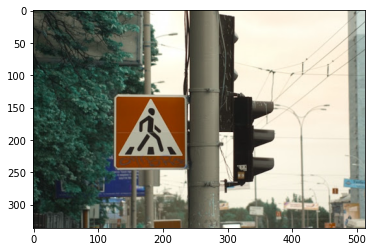

In [42]:
pesh = cv2.imread('peshehod.jpeg')
#pesh = cv2.cvtColor(pesh, cv2.COLOR_BGR2RGB)
plt.imshow(pesh) #перепутаны местами каналы, не забудьте))

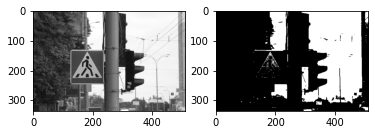

58546.0


In [44]:
gray_img = cv2.cvtColor(pesh, cv2.COLOR_RGB2GRAY)
_, thresholded_img = cv2.threshold(gray_img, 180, 255, cv2.THRESH_BINARY)
plt.subplot(121)
plt.imshow(gray_img, cmap='gray')
plt.subplot(122)
plt.imshow(thresholded_img, cmap='gray')
plt.show()
print(np.sum(thresholded_img)/255)

0.9992261559295802


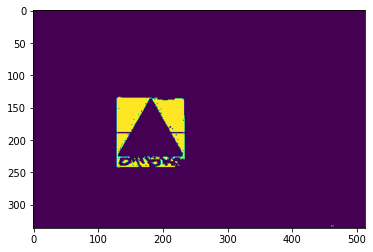

In [46]:
### PUT YOUR CODE HERE ###
hsv_img = cv2.cvtColor(pesh, cv2.COLOR_BGR2HSV)
thresh_img = cv2.inRange(hsv_img, (108-1, 255-15, 136-50), (108+1,255,136+20))
plt.imshow(thresh_img)
#Введите в поле для ответа число, которое получится после выполнения кода ниже:
print(np.sum(thresh_img[120:250, 120:250])/np.sum(thresh_img))

# Задание 2
Сделайте threshold Лены по порогу выше 180.

In [ ]:
### PUT YOUR CODE HERE

#Введите число, полученное в результате выполнения кода ниже в строку для ответов
print(np.sum(thresholded_img)/255)

Задание 2

In [48]:
pesh.shape[0]*pesh.shape[1]

172032